# Complete UNet Architecure Overview

# Key Learnings from this Notebook

* What is UNet Architecture?
* Working and Breakdown of UNet Architecture.
* Practicle Implementation of UNet.
* Applications of UNet Architecture.

This notebook is a one stop destination to learn everything about **UNet Architecture**.

# Please remember to **upvote** the notebook if you like the content. It is always a great motivation :)

# What is UNet Architecture?

U-Net is a convolutional neural network that was developed for biomedical image segmentation at the Computer Science Department of the University of Freiburg, Germany. The network is based on the fully convolutional network and its architecture was modified and extended to work with fewer training images and to yield more precise segmentations. 

The U-Net architecture stems from the so-called “**fully convolutional network**” first proposed by Long, Shelhamer, and Darrell.

The main idea is to supplement a usual contracting network by successive layers, where pooling operations are replaced by upsampling operators. Hence these layers increase the resolution of the output. What's more, a successive convolutional layer can then learn to assemble a precise output based on this information.

One important modification in U-Net is that there are a large number of feature channels in the **upsampling** part, which allow the network to propagate context information to higher resolution layers. As a consequence, the expansive path is more or less symmetric to the contracting part, and **yields a u-shaped architecture**. The network only uses the valid part of each convolution without any fully connected layers. To predict the pixels in the border region of the image, the **missing context is extrapolated** by mirroring the input image. This tiling strategy is important to apply the network to large images, since otherwise the resolution would be limited by the GPU memory.

![UNet](https://miro.medium.com/max/1800/1*Rmo71TyPxvLLM4FnlH5MDg.jpeg)

# Working and Breakdown of UNet Architecture.

The architecture consists of a **contracting path** to capture context and a **symmetric expanding** path that enables precise localization. 

The above statement precisely in very simple words explains the whole idea behind the UNet. UNet breaks the images down with the Convolution operations and re-creates it again with De-convolution operations.

Before diving into working of UNet, let's first learn about what exactly is Convolution and Dec-convolution operations.

Just hang tight because if you love Deep Learning, this is going to be very entertaining ;)

# Convolution Operation

Let’s use a simple example to explain how convolution operation works. Suppose we have a 4x4 matrix and apply a convolution operation on it with a 3x3 kernel, with no padding, and with a stride of 1. As shown further below, the output is a 2x2 matrix.

![](https://miro.medium.com/max/875/1*NoXQbZqPnxSnjdAwo93XcQ.png)


The convolution operation calculates the sum of the element-wise multiplication between the input matrix and kernel matrix. Since we have no padding and the stride of 1, we can do this only 4 times. Hence, the output matrix is 2x2.



![](https://miro.medium.com/max/875/1*M33WSDDeOSx6nbUZ0sbkxQ.png)


One important point of such convolution operation is that the positional connectivity exists between the input values and the output values.

For example, the top left values in the input matrix affect the top left value of the output matrix.
More concretely, the 3x3 kernel is used to connect the 9 values in the input matrix to 1 value in the output matrix. A convolution operation forms a many-to-one relationship. Let’s keep this in mind as we need it later on.

# Going Backward

Now, suppose we want to go the other direction. We want to associate 1 value in a matrix to 9 values in another matrix. It’s a one-to-many relationship. This is like going backward of convolution operation, and it is the core idea of transposed convolution.
For example, we up-sample a 2x2 matrix to a 4x4 matrix. The operation maintains the 1-to-9 relationship.

![](https://miro.medium.com/max/875/1*4a4OjlszAvi7-vqjOT0PoA.png)

But how do we perform such operation?

To talk about how, we need to define the convolution matrix and the transposed convolution matrix.


# Convolution Matrix


We can express a convolution operation using a matrix. It is nothing but a kernel matrix rearranged so that we can use a matrix multiplication to conduct convolution operations.

![](https://miro.medium.com/max/243/1*0wFFJUNHLRPd3r8R6WT8ng.png)

We rearrange the 3x3 kernel into a 4x16 matrix as below:

![](https://miro.medium.com/max/875/1*LKnTr_0k409vOjgj2h4-vg.png)

This is the convolution matrix. Each row defines one convolution operation. If you do not see it, the below diagram may help. Each row of the convolution matrix is just a rearranged kernel matrix with zero padding in different places.

![](https://miro.medium.com/max/875/1*yLMY-HCEGg2r7IHevR48oA.png)


To use it, we flatten the input matrix (4x4) into a column vector (16x1).

![](https://miro.medium.com/max/500/1*0_oqO0AFZBigpBxPcJ7c_A.png)

We can matrix-multiply the 4x16 convolution matrix with the 16x1 input matrix (16 dimensional column vector).

![](https://miro.medium.com/max/875/1*ql2ZxrS_h8D7KHNCrGndug.png)

The output 4x1 matrix can be reshaped into a 2x2 matrix which gives us the same result as before.

![](https://miro.medium.com/max/174/1*YZwIXPPyb_AsKmxn_em42Q.png)

In short, a convolution matrix is nothing but an rearranged kernel weights, and a convolution operation can be expressed using the convolution matrix.

So what?

The point is that with the convolution matrix, you can go from 16 (4x4) to 4 (2x2) because the convolution matrix is 4x16. Then, if you have a 16x4 matrix, you can go from 4 (2x2) to 16 (4x4).

# Transposed Convolution Matrix

We want to go from 4 (2x2) to 16 (4x4). So, we use a 16x4 matrix. But there is one more thing here. We want to maintain the 1 to 9 relationship.

Suppose we transpose the convolution matrix C (4x16) to C.T (16x4). We can matrix-multiply C.T (16x4) with a column vector (4x1) to generate an output matrix (16x1). The transposed matrix connects 1 value to 9 values in the output.

![](https://miro.medium.com/max/875/1*JDAuBt3aS9mz3aQQ7JKYKA.png)

The output can be reshaped into 4x4.

![](https://miro.medium.com/max/310/1*STkqLI87Q8qlO1gxpG6sJA.png)

We have just up-sampled a smaller matrix (2x2) into a larger one (4x4). The transposed convolution maintains the 1 to 9 relationship because of the way it lays out the weights.

NB: the actual weight values in the matrix does not have to come from the original convolution matrix. What’s important is that the weight layout is transposed from that of the convolution matrix.

The transposed convolution operation forms the same connectivity as the normal convolution but in the backward direction.
We can use it to conduct up-sampling. Moreover, the weights in the transposed convolution are learnable. So we do not need a predefined interpolation method.

Even though it is called the transposed convolution, it does not mean that we take some existing convolution matrix and use the transposed version. The main point is that the association between the input and the output is handled in the backward fashion compared with a standard convolution matrix (one-to-many rather than many-to-one association).

As such, the transposed convolution is not a convolution. But we can emulate the transposed convolution using a convolution. We up-sample the input by adding zeros between the values in the input matrix in a way that the direct convolution produces the same effect as the transposed convolution. You may find some article explains the transposed convolution in this way. However, it is less efficient due to the need to add zeros to up-sample the input before the convolution.


**Now that the basics are clear, we can get back to the UNet Architecture**

In the original paper, the UNET is described as follows:

![](https://miro.medium.com/max/875/1*OkUrpDD6I0FpugA_bbYBJQ.png)


If you did not understand, its okay. I will try to describe this architecture much more intuitively. Note that in the original paper, the size of the input image is 572x572x3, however, we will use input image of size 128x128x3. Hence the size at various locations will differ from that in the original paper but the core components remain the same.

Below is the detailed explanation of the architecture:

![](https://miro.medium.com/max/1250/1*yzbjioOqZDYbO6yHMVpXVQ.jpeg)

Points to note:

* 2@Conv layers means that two consecutive Convolution Layers are applied

* c1, c2, …. c9 are the output tensors of Convolutional Layers

* p1, p2, p3 and p4 are the output tensors of Max Pooling Layers

* u6, u7, u8 and u9 are the output tensors of up-sampling (transposed convolutional) layers

* The left hand side is the contraction path (Encoder) where we apply regular convolutions and max pooling layers.

* In the Encoder, the size of the image gradually reduces while the depth gradually increases. Starting from 128x128x3 to 8x8x256

* This basically means the network learns the “WHAT” information in the image, however it has lost the “WHERE” information

* The right hand side is the expansion path (Decoder) where we apply transposed convolutions along with regular convolutions

* In the decoder, the size of the image gradually increases and the depth gradually decreases. Starting from 8x8x256 to 128x128x1

* Intuitively, the Decoder recovers the “WHERE” information (precise localization) by gradually applying up-sampling

* To get better precise locations, at every step of the decoder we use skip connections by concatenating the output of the transposed convolution layers with the feature maps from the Encoder at the same level:
  u6 = u6 + c4
  u7 = u7 + c3
  u8 = u8 + c2
  u9 = u9 + c1
  
  After every concatenation we again apply two consecutive regular convolutions so that the model can learn to assemble a more precise output

* This is what gives the architecture a symmetric U-shape, hence the name UNET

* On a high level, we have the following relationship:
  Input (128x128x1) => Encoder =>(8x8x256) => Decoder =>Ouput (128x128x1)
  Below is the Keras code to define the above model:


# DeConvolution Layer in Neural Networks

**Deconvolution Network for Segmentation**

We now discuss two main operations, unpooling and deconvolution, in our deconvolution network in details.

**Unpooling**

Pooling in convolution network is designed to filter noisy activations in a lower layer by abstracting activations in a receptive field with a single representative value. Although it helps classification by retaining only robust activations in upper layers, spatial information within a receptive field is lost during pooling, which may be critical for precise localization that is required for semantic segmentation.

To resolve such issue, we employ unpooling layers in deconvolution network, which perform the reverse operation of pooling and reconstruct the original size of activations as illustrated in Figure 3. To implement the unpooling operation, we follow the similar approach proposed in [24, 25]. It records the locations of maximum activations selected during pooling operation in switch variables, which are employed to place each activation back to its original pooled location. This unpooling strategy is particularly useful to reconstruct the structure of input object as described.


**Deconvolution**

The output of an unpooling layer is an enlarged, yet sparse activation map. The deconvolution layers densify the sparse activations obtained by unpooling through convolution-like operations with multiple learned filters. However, contrary to convolutional layers, which connect multiple input activations within a filter window to a single activation, deconvolutional layers associate a single input activation with multiple outputs, as illustrated in Figure 3. The output of the deconvolutional layer is an enlarged and dense activation map. We crop the boundary of the enlarged activation map to keep the size of the output map identical to the one from the preceding unpooling layer.

The learned filters in deconvolutional layers correspond to bases to reconstruct shape of an input object. 
Therefore, similar to the convolution network, a hierarchical structure of deconvolutional layers are used to capture different level of shape details. The filters in lower layers tend to capture overall shape of an object while the class-specific fine details are encoded in the filters in higher layers. In this way, the network directly takes class-specific shape information into account for semantic segmentation, which is often ignored in other approaches based only on convolutional layers.

**Short summary on working of UNet**

In short if I had to explain the working of UNet, it will go something like this:

Image --> Convolution Network (Down-samples the image by convolution. Convolution in its core, reduces the dimensionality of the image by applying the various filters. On different levels of convolutions, we get images that are more fine-grained. Image becomes more and more fine grained with the level of convolution) --> Deconvolution Network (Upsamples the image by de-convolution operations. If you remember the Deconvolution operation explained above, it upsample the image by the use of appropriately sized de-convolution matrix. Then it makes a skip connection to its corresponding level of convolution layer and performs a convolution operation.) --> Segmented Image.

The image below would help cement the working of UNet Architecture:

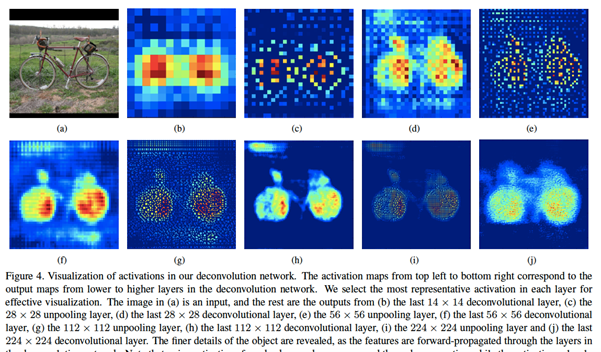

# Practicle Implementation of UNet.

Code for UNet Architecure can be easily implemented in python from scratch, like so: 

In [ ]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x
  
def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    
    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    
    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

UNet model can be created like above. You can also modify the architecture as per your experimentation needs as compare the results.

# Applications of UNet Architecture

You can find a lot of applications of UNet online about image segmentations. But I will tell you an application that I myself had a chance to work on in my professional career.
That is: Segmentation model to seperate out vocals from songs, so that we are left with only pure music(instrumentation signal).

Try to implement this on you own, I swear it will be a lot of fun !! ;)

# References

* https://arxiv.org/abs/1505.04597
* https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47#:~:text=8.-,UNET%20Architecture%20and%20Training,for%20Bio%20Medical%20Image%20Segmentation.&text=Thus%20it%20is%20an%20end,accept%20image%20of%20any%20size.
* https://naokishibuya.medium.com/up-sampling-with-transposed-convolution-9ae4f2df52d0